In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_recall_curve, average_precision_score

data = pd.read_csv("/home/ravindra/Downloads/healthcare-dataset-stroke-data.csv")
data.shape[1]
data.shape[0]

/tmp/ipykernel_86052/2228299165.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


5110

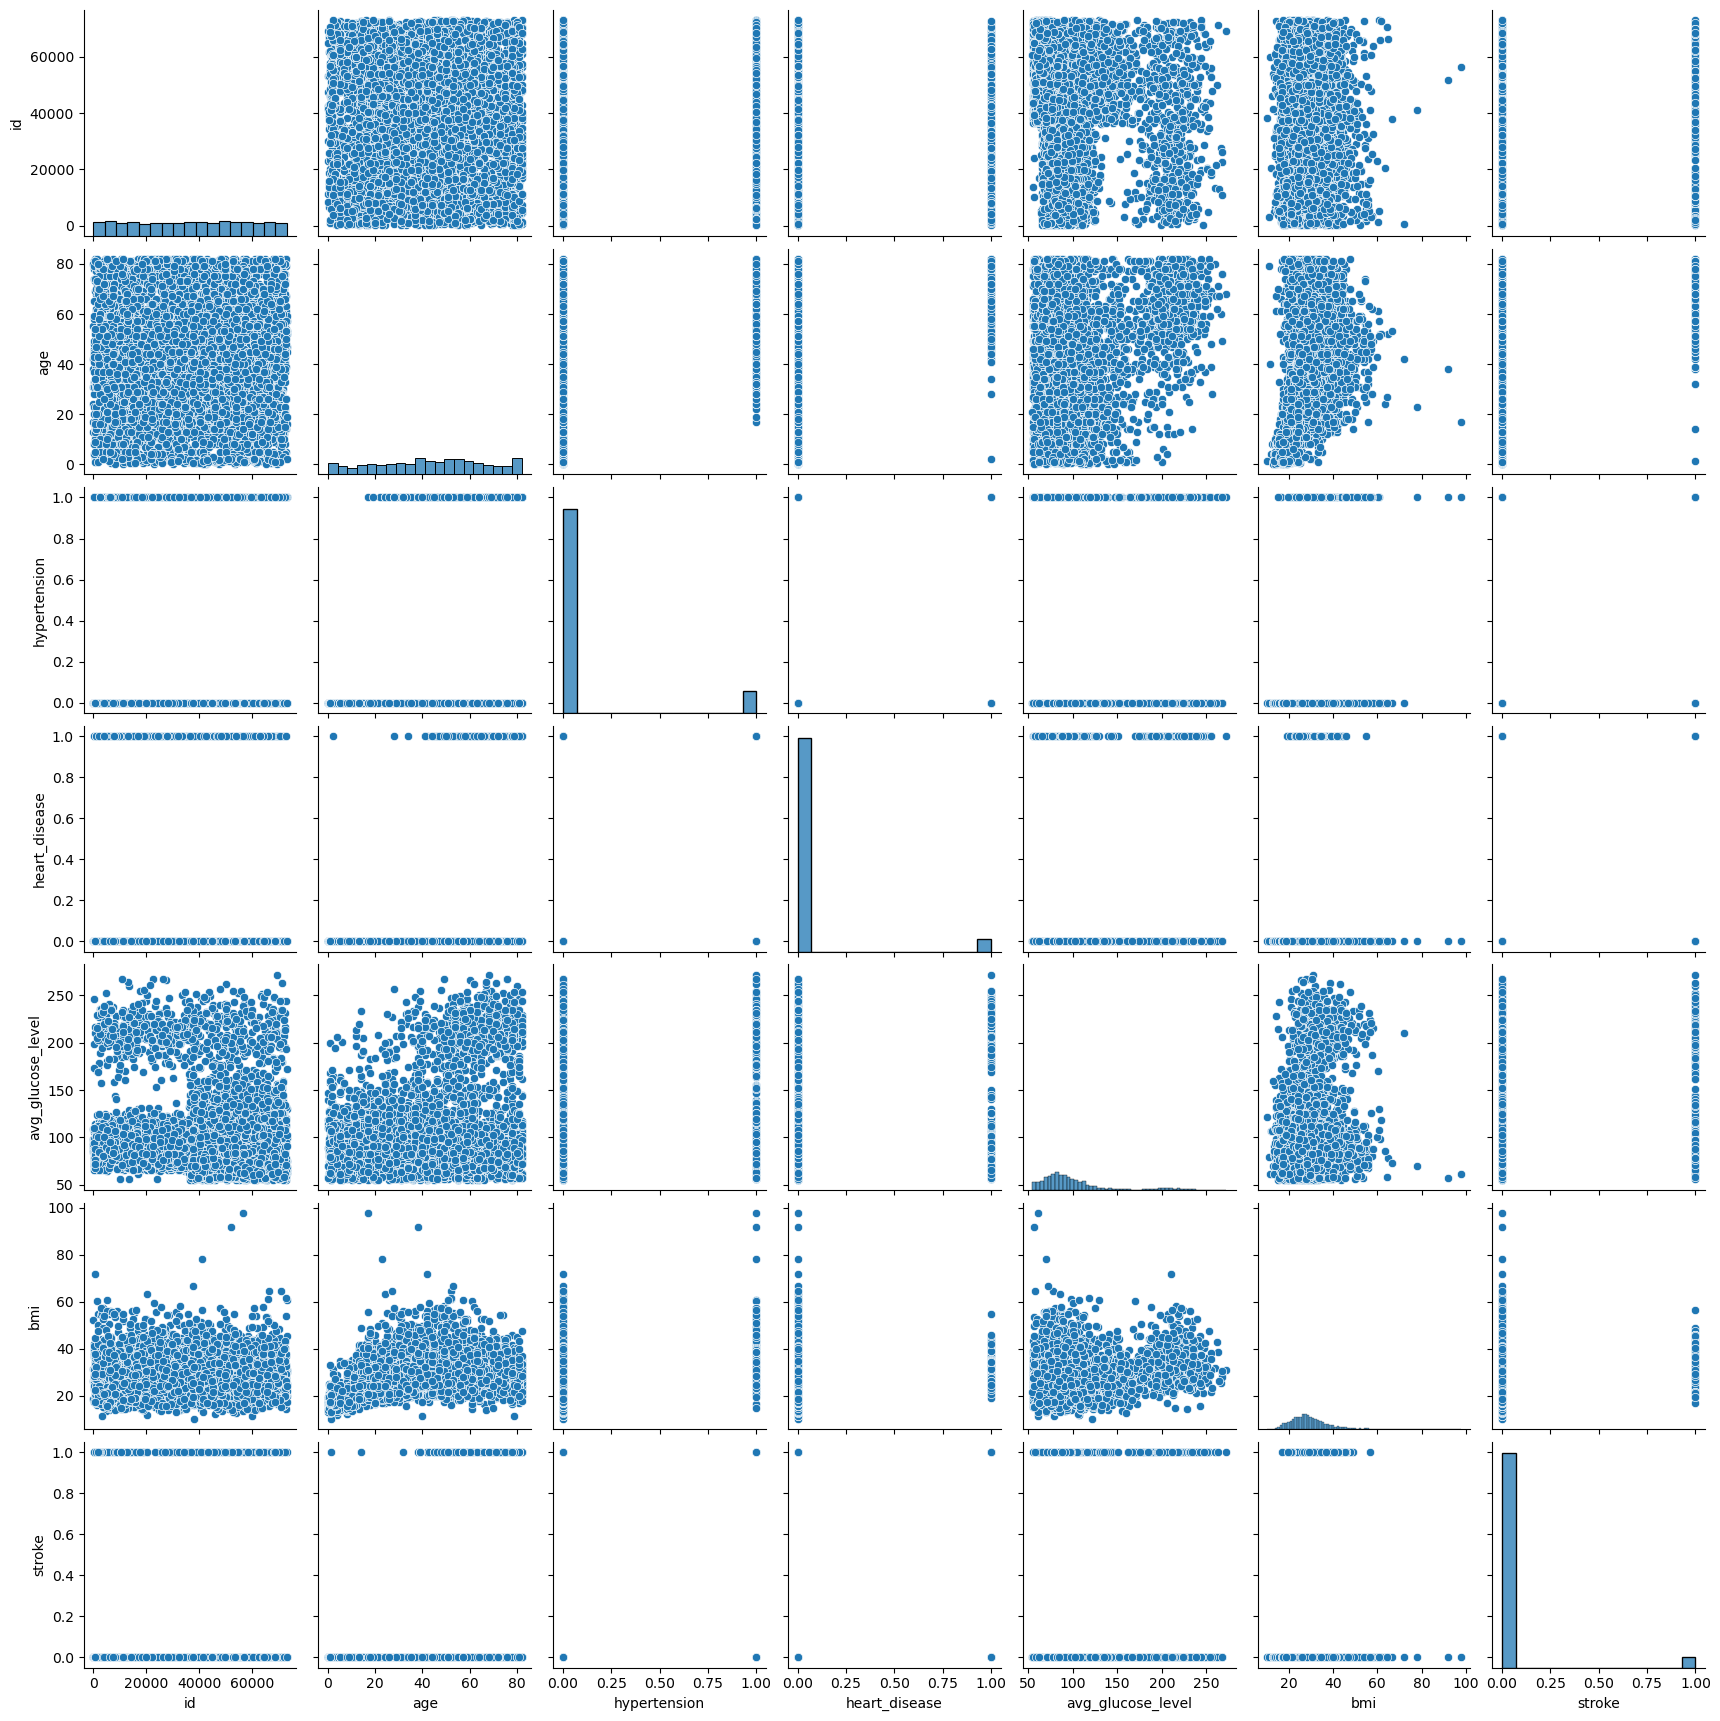

In [2]:
sns.pairplot(data)
plt.show()   #well the plan however is not liner regression but if it was it would be a terrible idea!
#holy fuck look at the pics

In [3]:
print(data.dtypes.value_counts())  
print(data.columns.to_list())
#print(data.heart_disease)
target = 'stroke'
print(data.head())

object     5
int64      4
float64    3
Name: count, dtype: int64
['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4  

In [4]:
for i in data.columns :
    if data[i].dtype == "object":
        print(i)

#print(data.ever_married)
print(data.work_type.value_counts())
print(data.head())

gender
ever_married
work_type
Residence_type
smoking_status
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   


In [5]:
#encoding time....
from sklearn.preprocessing import LabelEncoder
# Step 1: Label Encode binary categorical columns
binary_cols = ['gender', 'ever_married', 'Residence_type']

le = LabelEncoder()
for col in binary_cols:
    data[col] = le.fit_transform(data[col])

# Step 2: One-Hot Encode multi-class categorical columns
multi_class_cols = ['work_type', 'smoking_status']

data = pd.get_dummies(data, columns=multi_class_cols, drop_first=True) 


In [6]:
data.shape

(5110, 17)

In [7]:
#wait what about the distributiuon of the data what if its screwed up?
print(data[target].value_counts(normalize=True))
#but is this the trend truly present i mean...in reality too only a sample of people get brain stroke ?
#with my limited meical knowledge i do think i should let it stay that ways and not do any further up/dopwn sampling .... some stratufued split must be good enough
#nah we should....

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64


In [8]:
#identifying missing values
#and yeah imputing with mean
miss_val = data.isnull().sum()
print(miss_val)

data['bmi'] = data['bmi'].fillna(data['bmi'].mean())


id                                  0
gender                              0
age                                 0
hypertension                        0
heart_disease                       0
ever_married                        0
Residence_type                      0
avg_glucose_level                   0
bmi                               201
stroke                              0
work_type_Never_worked              0
work_type_Private                   0
work_type_Self-employed             0
work_type_children                  0
smoking_status_formerly smoked      0
smoking_status_never smoked         0
smoking_status_smokes               0
dtype: int64


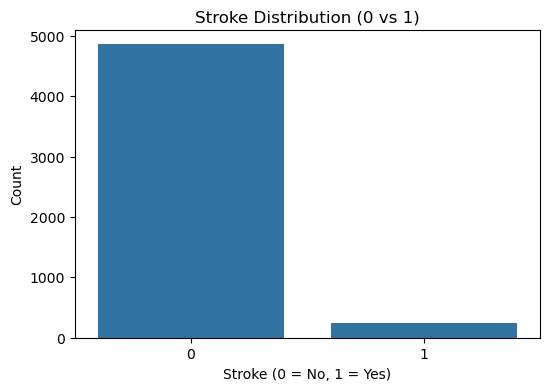

In [9]:
#visualising stroke vs no-stroke


# Count plot for stroke distribution (0 vs 1)
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data)
plt.title('Stroke Distribution (0 vs 1)')
plt.xlabel('Stroke (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


In [10]:


# Define the categorical columns to apply One-Hot Encoding
categorical_columns = data.select_dtypes(include=['object']).columns

# Perform One-Hot Encoding on the categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the new dataset
data_encoded.head()


,id,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1,67.0,0,1,1,1,228.69,36.600000,1,False,True,False,False,True,False,False
1,51676,0,61.0,0,0,1,0,202.21,28.893237,1,False,False,True,False,False,True,False
2,31112,1,80.0,0,1,1,0,105.92,32.500000,1,False,True,False,False,False,True,False
3,60182,0,49.0,0,0,1,1,171.23,34.400000,1,False,True,False,False,False,False,True
4,1665,0,79.0,1,0,1,0,174.12,24.000000,1,False,False,True,False,False,True,False


stroke                            1.000000
age                               0.245257
heart_disease                     0.134914
avg_glucose_level                 0.131945
hypertension                      0.127904
ever_married                      0.108340
smoking_status_formerly smoked    0.064556
work_type_Self-employed           0.062168
bmi                               0.038947
Residence_type                    0.015458
work_type_Private                 0.011888
smoking_status_smokes             0.008939
gender                            0.008929
id                                0.006388
smoking_status_never smoked      -0.004129
work_type_Never_worked           -0.014882
work_type_children               -0.083869
Name: stroke, dtype: float64


/tmp/ipykernel_86052/85891209.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')


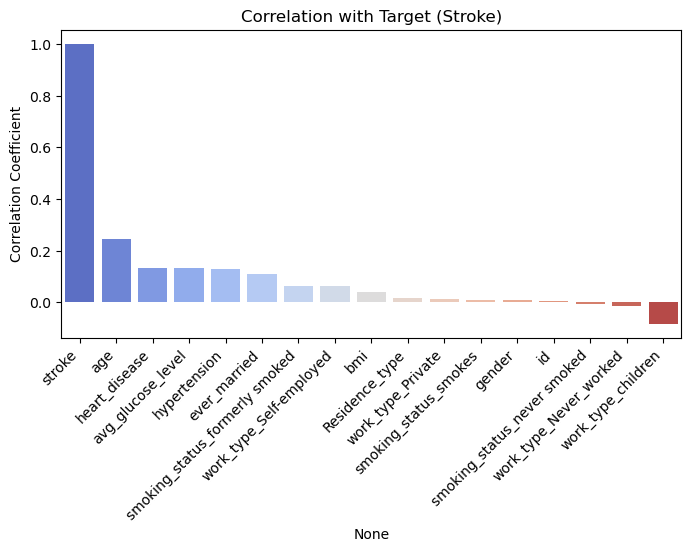

In [11]:


# Compute the correlation matrix
correlation_matrix = data_encoded.corr()

# Extract the correlation of each feature with the target (stroke)
correlation_with_target = correlation_matrix['stroke'].sort_values(ascending=False)

# Print the correlation with the target
print(correlation_with_target)

# Set up the matplotlib figure
plt.figure(figsize=(8, 4))

# Draw a barplot of the correlation with the target
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values, palette='coolwarm')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Display the plot
plt.title('Correlation with Target (Stroke)')
plt.ylabel('Correlation Coefficient')
plt.show()


In [12]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Define X (features) and y (target)
X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SMOTE with minority sampling strategy
smote = SMOTE(sampling_strategy='minority', random_state=42)

# Fit SMOTE to the training data and generate synthetic samples
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the shape of the new balanced dataset
print(f"Original training data shape: {X_train.shape}")
print(f"Resampled training data shape: {X_train_smote.shape}")



Original training data shape: (4088, 16)
Resampled training data shape: (7802, 16)


In [13]:


# Split the data into train and test sets after applying SMOTE
X_train_smote, X_test, y_train_smote, y_test = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

# Check the class distribution of the new training and testing sets
print("Training set distribution:\n", y_train_smote.value_counts())
print("Test set distribution:\n", y_test.value_counts())


Training set distribution:
 stroke
1    3135
0    3106
Name: count, dtype: int64
Test set distribution:
 stroke
0    795
1    766
Name: count, dtype: int64


In [14]:

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_smote_scaled = scaler.fit_transform(X_train_smote)

# Transform the test data using the same scaler (do not fit on test data)
X_test_scaled = scaler.transform(X_test)

# Print the first few rows of the scaled training and test data
print("Scaled Training Data Sample:\n", X_train_smote_scaled[:5])
print("Scaled Test Data Sample:\n", X_test_scaled[:5])


Scaled Training Data Sample:
 [[-0.19585712 -0.65283099  1.13512448 -0.27875937 -0.19867985  0.6485902
  -0.84782678 -0.84273499  0.68775142 -0.04908413  0.6453507   1.54834978
  -0.28307514  1.48729393  1.03274212 -0.55828808]
 [-1.2097438  -0.65283099 -2.18294096 -0.27875937 -0.19867985 -1.5418056
   1.17948622 -0.74634555 -2.28953999 -0.04908413 -1.54954507 -0.6458489
   3.53263098 -0.67236205 -0.96829594 -0.55828808]
 [-1.12206433 -0.65283099  0.57436878 -0.27875937 -0.19867985  0.6485902
  -0.84782678  1.19002369  1.47961257 -0.04908413  0.6453507  -0.6458489
  -0.28307514  1.48729393  1.03274212 -0.55828808]
 [ 0.53413943  1.53179003  0.18476845 -0.27875937 -0.19867985  0.6485902
  -0.84782678 -1.09943069  0.29545779 -0.04908413  0.6453507  -0.6458489
  -0.28307514 -0.67236205  1.03274212 -0.55828808]
 [ 0.06764568 -0.65283099  1.20613329 -0.27875937 -0.19867985 -1.5418056
  -0.84782678 -1.0060768   0.4657271  -0.04908413  0.6453507  -0.6458489
  -0.28307514 -0.67236205  1.032742

/home/ravindra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ravindra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ravindra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ravindra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ravindra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1207: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/home/ravindra/.local/lib/python3.10/site-packages/sklearn/linear_model/_logisti

Best Hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
ROC AUC Score: 0.9503473077491501


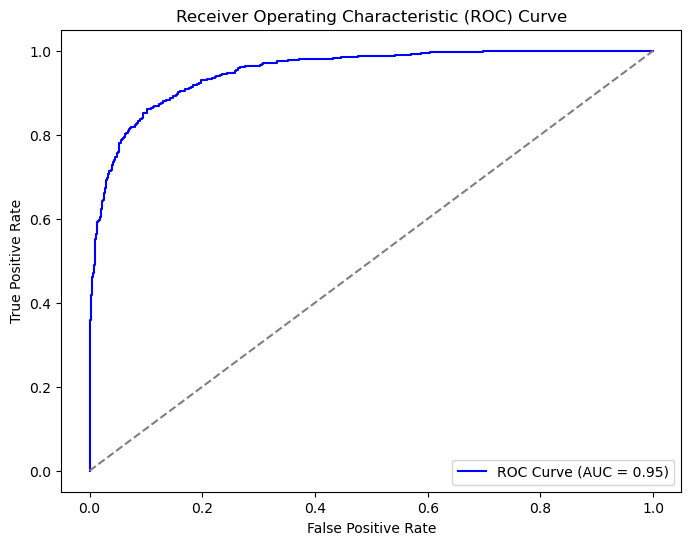

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt

# Set up the parameter grid for GridSearchCV
param_grid = {
    'solver': ['liblinear', 'lbfgs', 'saga'],
    'penalty': ['l1', 'l2', 'elasticnet', None],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [100, 200, 300],
}

# Initialize the logistic regression model
log_reg = LogisticRegression()

# Initialize GridSearchCV with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_smote_scaled, y_train_smote)

# Get the best parameters from the grid search
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Create a Logistic Regression model with the best hyperparameters
best_log_reg = LogisticRegression(solver=best_params['solver'], 
                                  penalty=best_params['penalty'], 
                                  C=best_params['C'], 
                                  max_iter=best_params['max_iter'])

# Fit the model with the best parameters on the training data
best_log_reg.fit(X_train_smote_scaled, y_train_smote)

# Predict the probabilities on the test set
y_prob = best_log_reg.predict_proba(X_test_scaled)[:, 1]

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC AUC Score:", roc_auc)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='b', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


SVM ROC-AUC score: 0.9752680756030675


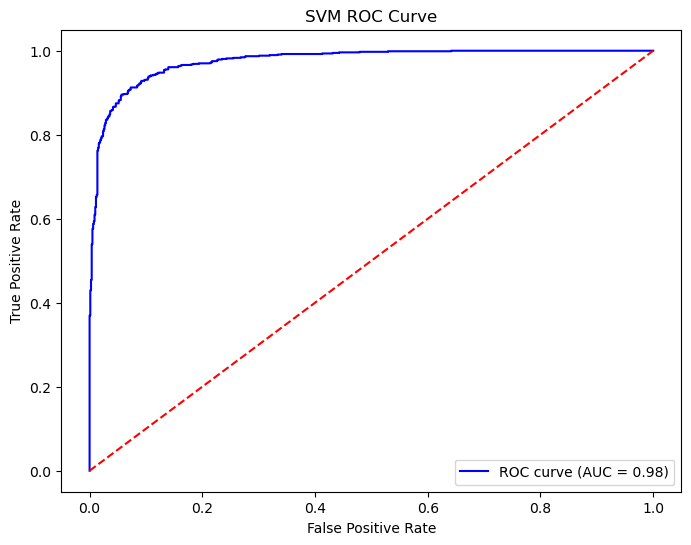

In [16]:


# Step 1: Define the SVM model with reasonable hyperparameters
svm_model = SVC(C=1, kernel='rbf', gamma='scale', probability=True)

# Step 2: Fit the model to the training data
svm_model.fit(X_train_smote_scaled, y_train_smote)

# Step 3: Predict probabilities on the test set
y_pred_prob_svm = svm_model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Calculate ROC-AUC score
roc_auc_svm = roc_auc_score(y_test, y_pred_prob_svm)
print(f"SVM ROC-AUC score: {roc_auc_svm}")

# Step 5: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_svm)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='b', label=f'ROC curve (AUC = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.show()


Best hyperparameters for Random Forest: {'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Random Forest ROC-AUC score: 0.9936335123240883


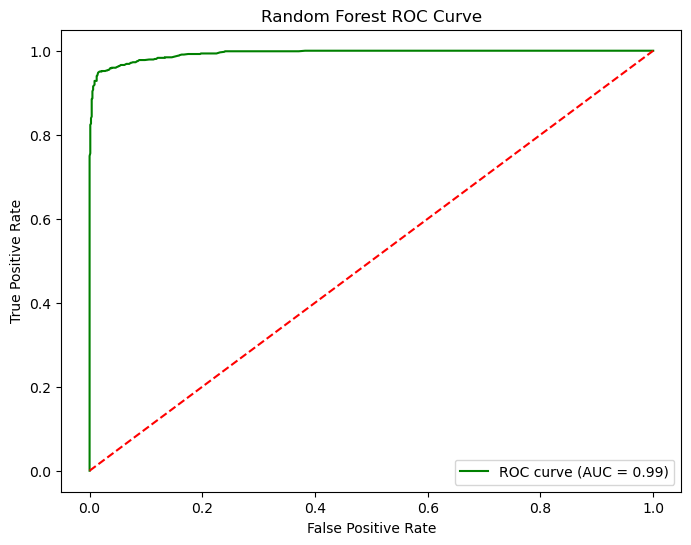

In [17]:

# Step 1: Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Step 2: Set up hyperparameter grid for GridSearchCV (Optional)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 3: Set up GridSearchCV to find the best parameters
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Step 4: Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train_smote_scaled, y_train_smote)

# Step 5: Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f"Best hyperparameters for Random Forest: {best_params_rf}")

# Step 6: Use the best model to predict probabilities on the test set
best_rf_model = grid_search_rf.best_estimator_
y_pred_prob_rf = best_rf_model.predict_proba(X_test_scaled)[:, 1]

# Step 7: Calculate ROC-AUC score
roc_auc_rf = roc_auc_score(y_test, y_pred_prob_rf)
print(f"Random Forest ROC-AUC score: {roc_auc_rf}")

# Step 8: Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_rf)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='g', label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.show()


Random Forest Average Precision Score: 0.9939325429084714


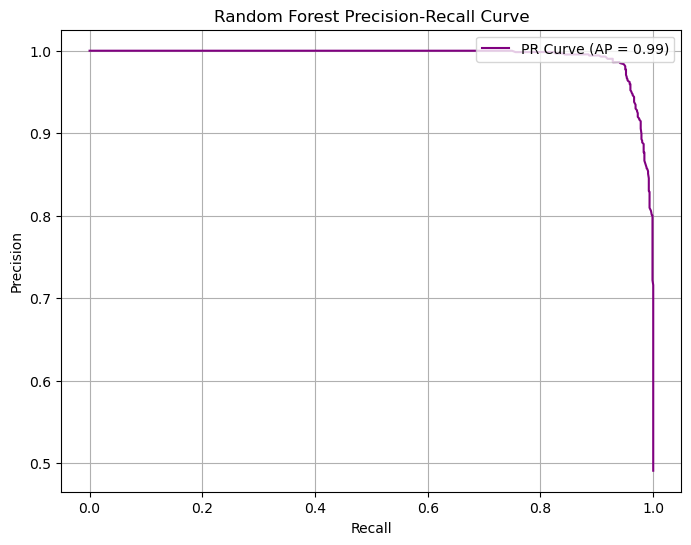

In [18]:


# Step 1: Compute precision, recall, thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_rf)

# Step 2: Compute average precision score
avg_precision = average_precision_score(y_test, y_pred_prob_rf)
print(f"Random Forest Average Precision Score: {avg_precision}")

# Step 3: Plot the PR curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f"PR Curve (AP = {avg_precision:.2f})", color='purple')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Random Forest Precision-Recall Curve")
plt.legend(loc="upper right")
plt.grid()
plt.show()


Step 1: Defining the Gradient Boosting model...
Step 2: Setting up the hyperparameter grid...
Step 3: Initializing GridSearchCV...
Step 4: Fitting GridSearchCV to the training data...
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Step 5: Fetching the best parameters and ROC-AUC score...
Best hyperparameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Gradient Boosting ROC-AUC score: 0.9912343793618733


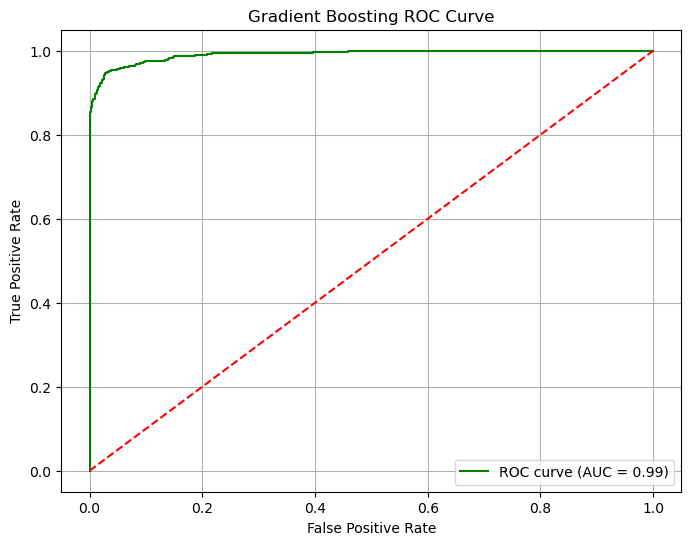

In [19]:


print("Step 1: Defining the Gradient Boosting model...")
gb_model = GradientBoostingClassifier()

print("Step 2: Setting up the hyperparameter grid...")
param_grid = {
    'n_estimators': [100, 150],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8, 1.0]
}

print("Step 3: Initializing GridSearchCV...")
grid_search_gb = GridSearchCV(estimator=gb_model,
                               param_grid=param_grid,
                               cv=5,
                               scoring='roc_auc',
                               n_jobs=12,
                               verbose=2)

print("Step 4: Fitting GridSearchCV to the training data...")
grid_search_gb.fit(X_train_smote_scaled, y_train_smote)

print("Step 5: Fetching the best parameters and ROC-AUC score...")
best_params_gb = grid_search_gb.best_params_
print(f"Best hyperparameters for Gradient Boosting: {best_params_gb}")

y_pred_prob_gb = grid_search_gb.predict_proba(X_test_scaled)[:, 1]
roc_auc_gb = roc_auc_score(y_test, y_pred_prob_gb)
print(f"Gradient Boosting ROC-AUC score: {roc_auc_gb}")

# Step 6: Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob_gb)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='green', label=f'ROC curve (AUC = {roc_auc_gb:.2f})')
plt.plot([0, 1], [0, 1], color='r', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Gradient Boosting ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


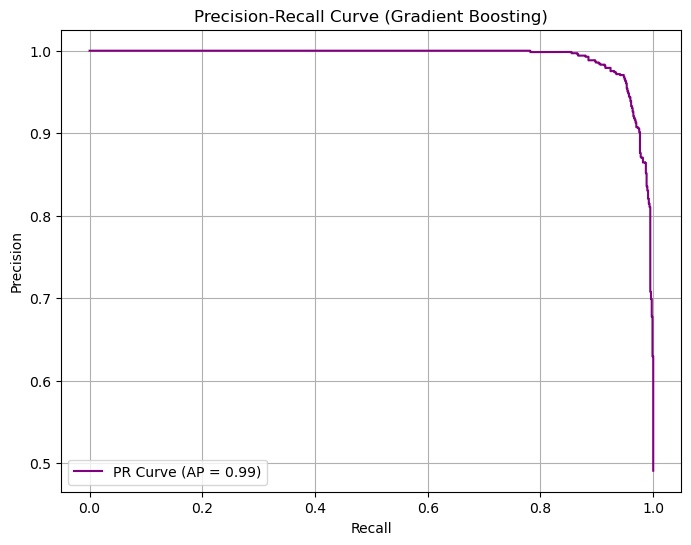

In [20]:


# Calculate precision, recall, and thresholds
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob_gb)
ap_score = average_precision_score(y_test, y_pred_prob_gb)

# Plot the PR curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR Curve (AP = {ap_score:.2f})', color='purple')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve (Gradient Boosting)')
plt.legend(loc='lower left')
plt.grid()
plt.show()


Calculating permutation importances...


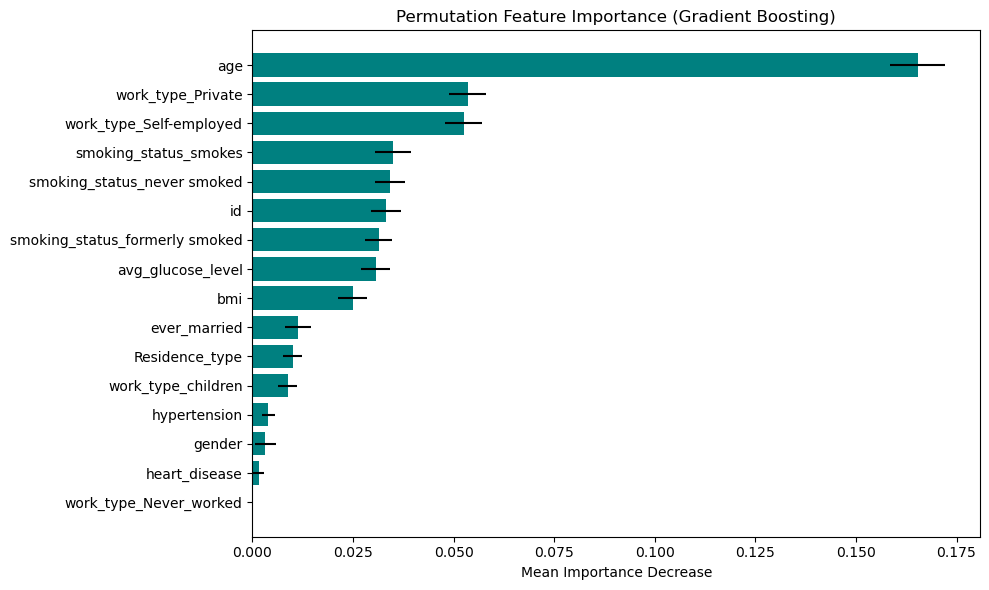

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   5.5s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   4.3s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   2.4s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   3.5s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=150, subsample=0.8; total time=   5.7s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=150, subsample=0.8; total time=   3.7s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   4.4s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=150, subs

In [21]:
from sklearn.inspection import permutation_importance


# Step 1: Use the best estimator from your gradient boosting grid search
gb_model = grid_search_gb.best_estimator_

# Step 2: Compute permutation importance on test data
print("Calculating permutation importances...")
result = permutation_importance(gb_model, X_test_scaled, y_test, n_repeats=10, random_state=42)

# Step 3: Extract and sort
sorted_idx = result.importances_mean.argsort()

# Step 4: Plot
plt.figure(figsize=(10, 6))
plt.barh(np.array(X.columns)[sorted_idx], result.importances_mean[sorted_idx], 
         xerr=result.importances_std[sorted_idx], color='teal')
plt.xlabel("Mean Importance Decrease")
plt.title("Permutation Feature Importance (Gradient Boosting)")
plt.tight_layout()
plt.show()
